In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('/kaggle/input/adni-4c-alzheimers-mri-classification-dataset/AugmentedAlzheimerDataset',image_size=(150,150),batch_size=32,label_mode='categorical').map(lambda x,y:(x/255,y))

In [ ]:
train_data=data.take(int(0.95*len(data)))
val_data=data.skip(int(0.95*len(data))).take(int(len(data)*0.025))
test_data=data.skip(int(0.95*len(data))+int(len(data)*0.025)).take(int(len(data)*0.025))

In [ ]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,BatchNormalization,Input
from keras.regularizers import l2
from keras.initializers import HeNormal

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Input, Dropout
from keras.regularizers import l2
from keras.initializers import HeNormal

def build_model(input_shape=(150, 150, 3), num_classes=10):
    model = Sequential()

    # Input Layer
    model.add(Input(shape=input_shape))

    # Conv Block 1
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                     kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv Block 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                     kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv Block 3
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                     kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=l2(5e-5)))
    model.add(BatchNormalization())

    
    model.add(Dense(num_classes, activation='softmax'))  # or 'sigmoid' for binary

    return model


In [ ]:
model=build_model(input_shape=(150, 150, 3), num_classes=4)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,validation_data=val_data,epochs=10)

In [20]:
model=tf.keras.models.load_model('/kaggle/input/alzimer-model-with-90-accuracy/keras/default/1/Alzimer.keras')

In [21]:
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 37, 37, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 37, 37, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │       1,327,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,153,038 (15.84 MB)

 Trainable params: 1,384,196 (5.28 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2,768,394 (10.56 MB)

In [22]:
from pprint import pprint

print("{:<25} {:<20} {:<25} {:<10}".format("Layer Name", "Layer Type", "Output Shape", "Param #"))
print("-" * 85)

for layer in model.layers:
    name = layer.name
    class_name = layer.__class__.__name__
    try:
        output_shape = str(layer.output.shape)
    except:
        output_shape = "N/A"
    params = layer.count_params()
    
    print("{:<25} {:<20} {:<25} {:<10}".format(name, class_name, output_shape, params))
    
    config = layer.get_config()

    for key, value in config.items():
        print(f"    ↪ {key}: {value}")


Layer Name                Layer Type           Output Shape              Param #   
-------------------------------------------------------------------------------------
conv2d_18                 Conv2D               (None, 150, 150, 32)      896       
    ↪ name: conv2d_18
    ↪ trainable: True
    ↪ dtype: {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}
    ↪ filters: 32
    ↪ kernel_size: (3, 3)
    ↪ strides: (1, 1)
    ↪ padding: same
    ↪ data_format: channels_last
    ↪ dilation_rate: (1, 1)
    ↪ groups: 1
    ↪ activation: relu
    ↪ use_bias: True
    ↪ kernel_initializer: {'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
    ↪ bias_initializer: {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}
    ↪ kernel_regularizer: {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 0.0001}, 'registered_name'

In [ ]:
loss,acc=model.evaluate(test_data)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the class labels based on your provided information
class_labels = ["Alzheimer's Disease", "Cognitively Normal", 
                "Early Mild Cognitive Impairment (EMCI)", 
                "Late Mild Cognitive Impairment (LMCI)"]


# Assuming val_data is already defined and contains reshaped and normalized images
# You can use the 'take' function to select a batch of images from val_data
for idx, (img_batch, label_batch) in enumerate(val_data.take(1)):  # Take one batch (adjust as needed)
    for i in range(4):  # Process the first 4 images from the batch
        # Extract the image and true label (assuming one-hot encoded labels)
        img = img_batch[i]
        true_class = label_batch[i].numpy().argmax()  # Get the index of the true class
        
        # Predict the image class probabilities
        predictions = model.predict(np.expand_dims(img, axis=0))  # Add batch dimension
        
        # Get the predicted class and confidence
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0])

        # Display the image with true and predicted labels
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(f"True: {class_labels[true_class]}\nPred: {class_labels[predicted_class]} ({confidence*100:.2f}%)")
        plt.show()

        # Print the true and predicted labels along with confidence
        print(f"True Label: {class_labels[true_class]}")
        print(f"Predicted Label: {class_labels[predicted_class]}")
        print(f"Confidence: {confidence * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


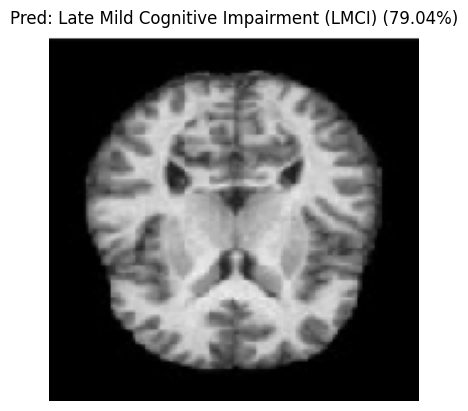

Predicted Label: Late Mild Cognitive Impairment (LMCI)
Confidence: 79.04%


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define the class labels
class_labels = ["Alzheimer's Disease", "Cognitively Normal", 
                "Early Mild Cognitive Impairment (EMCI)", 
                "Late Mild Cognitive Impairment (LMCI)"]


model = tf.keras.models.load_model('Alzimer.keras')
# Specify the path to the image you want to load
img_path = 'Screenshot 2025-11-08 215941.png'  # Replace with the actual image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match the model's input size
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (required for the model)
img_array = img_array / 255.0  # Normalize if your model was trained with normalized images

# Make a prediction using the model
predictions = model.predict(img_array)

# Get the predicted class and confidence
predicted_class = np.argmax(predictions[0])  # Get the index of the predicted class
confidence = np.max(predictions[0])  # Get the confidence (probability)

# Display the image with the true and predicted labels (you can replace the true class if needed)
# Since we're processing only one image, assume true class is unknown here for demonstration
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title(f"Pred: {class_labels[predicted_class]} ({confidence*100:.2f}%)")
plt.show()

# Print the predicted label and confidence in the console
print(f"Predicted Label: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")


In [ ]:
model.save('Alzimer.keras')